In [13]:
import sys
from pathlib import Path
home = str(Path.home())
print(home)
sys.path.insert(1, '/home/duncan/sara-socket-client/CHESS2021/')
sys.path.insert(1, '/home/duncan/sara-socket-client/Scripts/')
sys.path.insert(1, '/home/duncan/sara-socket-client/')
sys.path.insert(1, '/home/duncan/sara-scripts-and-notebooks/')
import yaml
import json
import os
import copy as cp
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
from Interpolate2D import *
import imageio as io
from platelvlh5maker_new import H5_builder
def CalibReader_2021(path):
    """Extracts the (x,y) and z data from a .txt file"""
    raw = np.genfromtxt(path,delimiter=',',dtype=float)
    x = raw[:,0]
    y = raw[:,1]
    z = raw[:,2]
    points = []
    for xx, yy in zip(x, y):
        points.append([xx, yy])
    return points, z
%matplotlib widget

/home/duncan


### 01_GUI_Test y-shifts

In [ ]:
points1, values1 = CalibReader_2021('/home/duncan/aux/01_GUI_Test/01_GUI_Test_yshifts.txt')

In [ ]:
interpolate2d(points_in=points1,values_in=values1,fpt=[-20,0],plot=True)

### 02_GUI_Test y-shifts

In [ ]:
points2, values2 = CalibReader_2021('/home/duncan/aux/02_GUI_Test/02_GUI_Test_yshifts.txt')

In [ ]:
interpolate2d(points_in=points2,values_in=values2,fpt=[-20,0],plot=True)

In [ ]:
plt.figure()
points2 = np.array(points2)
plt.scatter(x=points2[:,0], y=points2[:,1], c=values2-values1)
plt.colorbar()

### 03_GUI_Test y-shifts

In [ ]:
points3, values3 = CalibReader_2021('/home/duncan/aux/03_GUI_Test/03_GUI_Test_yshifts.txt')

In [ ]:
interpolate2d(points_in=points3,values_in=values3,fpt=[-20,0],plot=True)

In [ ]:
plt.figure()
points3 = np.array(points3)
plt.scatter(x=points2[:,0], y=points2[:,1], c=values3-values2)
plt.colorbar()

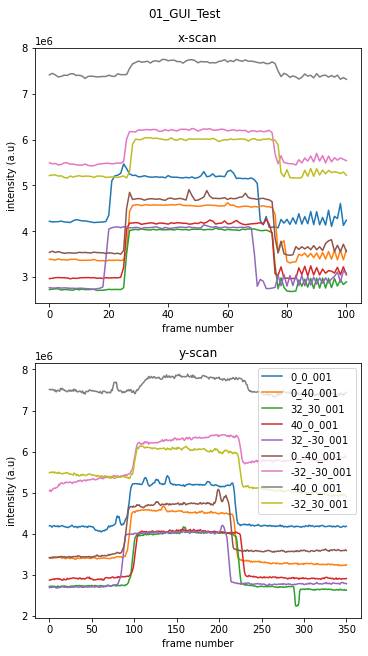

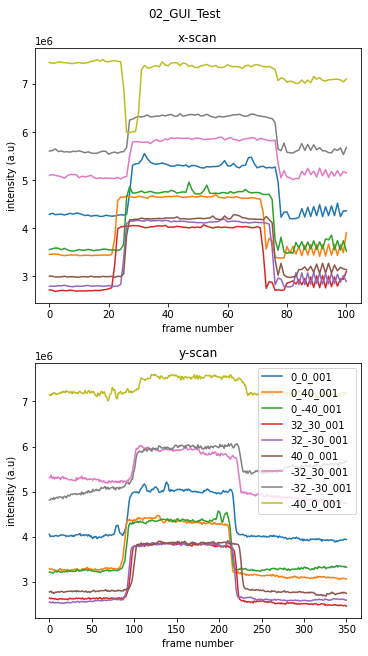

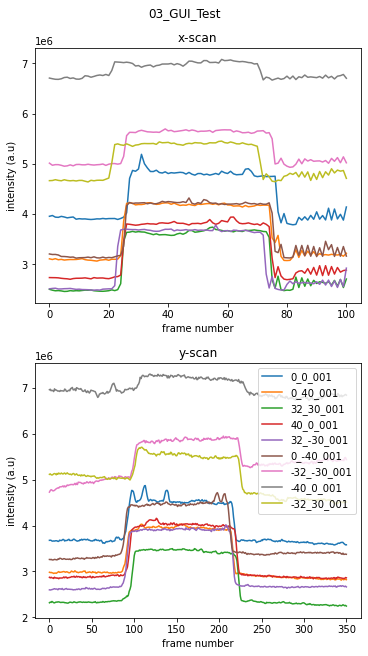

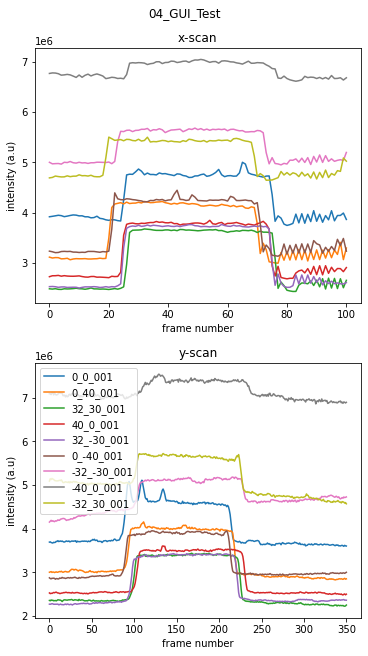

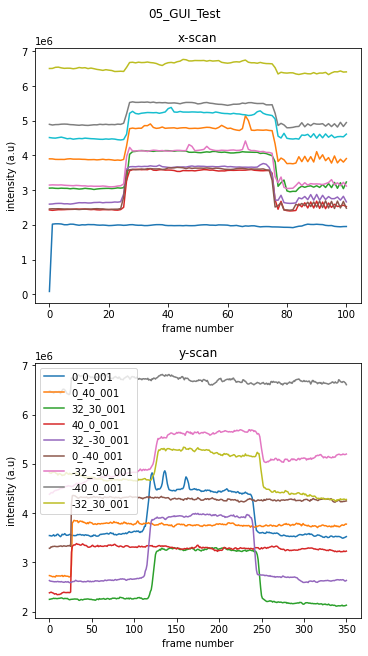

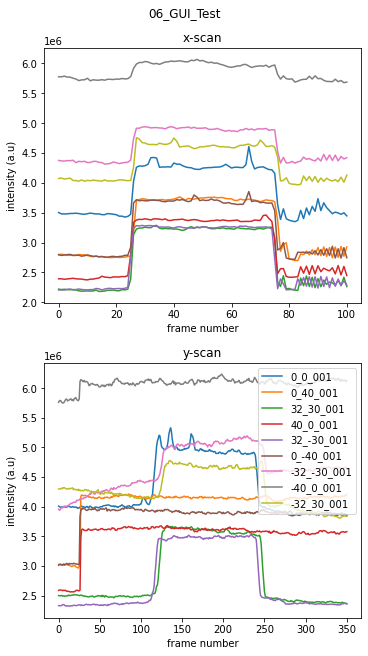

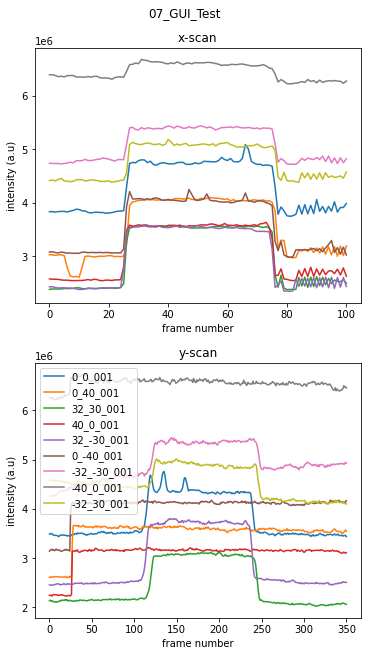

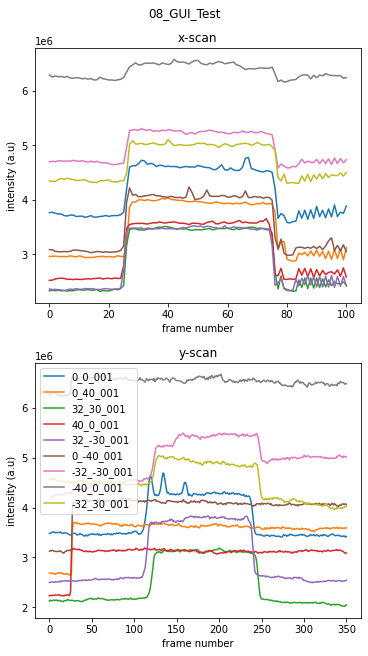

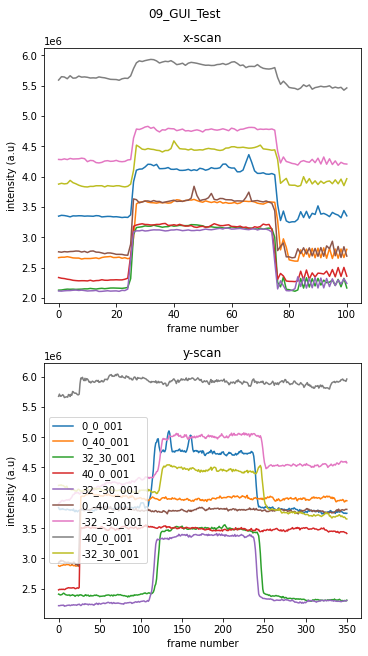

In [7]:
plt.close('all')
for run_path in glob.glob('/home/duncan/aux/GUI_tests/*/'):
    fig, ax = plt.subplots(2,1,figsize=(5,9),constrained_layout=True)
    runname = os.path.basename(run_path[:-1])
    fig.suptitle(runname)
    for file in glob.glob(os.path.join(run_path,'linescnas/*.npy')):
        name = os.path.basename(file)[12:-4]
        data = np.load(file)
#         print(min(data[:,0]), max(data[:,0]))
        if os.path.basename(file)[0]=='h':
            ax[0].plot(data[:,1],label=name)
        else:
            ax[1].plot(data[:,1],label=name)
    ax[0].set(
        xlabel="frame number",
        ylabel="intensity (a.u)",
        title="x-scan"
    )
    
    ax[1].set(
        xlabel="frame number",
        ylabel="intensity (a.u)",
        title="y-scan"
    )
    ax[1].legend()
#     fig.legend(bbox_to_anchor=(1.04,1))    
    plt.show()

In [35]:
plt.close('all')
for run_path in glob.glob('/home/duncan/aux/TriggerTimingsIssue/*/')[:-1]:
    fig, ax = plt.subplots(constrained_layout=True)
    runname = os.path.basename(run_path[:-1])
    fig.suptitle(runname)
    try:
        data = np.genfromtxt(f'{run_path}{runname}_yshifts.txt',delimiter=',')
        data = data[data[:,2]>-1]
        print(f"mean: {np.round(np.mean(data[:,2])*1000)} \u03BCm    std: {np.round(np.std(data[:,2])*1000)} \u03BCm")
    except:
        None
    for file in glob.glob(os.path.join(run_path,'linescnas/*.npy')):
        name = os.path.basename(file)[12:-4]
        data = np.load(file)
#         print(min(data[:,0]), max(data[:,0]))
        if os.path.basename(file)[0]=='h':
            ax.plot(data[:,1],label=name)
        else:
            ax.plot(data[:,1],label=name)
    ax.set(
        xlabel="frame number",
        ylabel="intensity (a.u)",
        title="x-scan"
    )
    
    ax.set(
        xlabel="frame number",
        ylabel="intensity (a.u)",
        title="y-scan"
    )
    ax.legend()
#     fig.legend(bbox_to_anchor=(1.04,1))    
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

mean: -554.0 μm    std: 64.0 μm


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-35-f6602402365d>:7: UserWarning: genfromtxt: Empty input file: "/home/duncan/aux/TriggerTimingsIssue/16_GUI_Test/16_GUI_Test_yshifts.txt"
  data = np.genfromtxt(f'{run_path}{runname}_yshifts.txt',delimiter=',')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

mean: -566.0 μm    std: 116.0 μm


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

mean: -568.0 μm    std: 97.0 μm


In [42]:
fig, ax = plt.subplots(2,1,figsize=(5,9),constrained_layout=True)
fig.suptitle(runname)
for file in glob.glob(os.path.join('/home/duncan/aux/TriggerTimingsIssue/20_GUI_Test/linescnas/*.npy')):
    name = os.path.basename(file)[12:-4]
    data = np.load(file)
#         print(min(data[:,0]), max(data[:,0]))
    if os.path.basename(file)[0]=='h':
        ax[0].plot(data[:,1],label=name)
    else:
        ax[1].plot(data[:,1],label=name)
ax[0].set(
    xlabel="frame number",
    ylabel="intensity (a.u)",
    title="x-scan"
)

ax[1].set(
    xlabel="frame number",
    ylabel="intensity (a.u)",
    title="y-scan"
)
ax[1].legend()
#     fig.legend(bbox_to_anchor=(1.04,1))    
plt.show()
data = np.genfromtxt('/home/duncan/aux/TriggerTimingsIssue/20_GUI_Test/20_GUI_Test_yshifts.txt',delimiter=',')
f"mean: {np.round(np.mean(data[:,2])*1000)} \u03BCm    std: {np.round(np.std(data[:,2])*1000)} \u03BCm"

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

'mean: -917.0 μm    std: 143.0 μm'

In [23]:
data = np.genfromtxt('/home/duncan/aux/TriggerTimingsIssue/18_GUI_Test/18_GUI_Test_yshifts.txt',delimiter=',')
data = data[data[:,2]>-1]
f"mean: {np.round(np.mean(data[:,2])*1000)} \u03BCm    std: {np.round(np.std(data[:,2])*1000)} \u03BCm"

'mean: -568.0 μm    std: 97.0 μm'

In [33]:
for file in glob.glob('/home/duncan/aux/GUI_tests/*/*.txt')[:4]:
    fname = os.path.basename(file)[:-4]
    data = np.genfromtxt(file,delimiter=',')
    print(f"{fname} mean: {np.round(np.mean(data[:,2])*1000)} \u03BCm    std: {np.round(np.std(data[:,2])*1000)} \u03BCm")

for file in glob.glob('/home/duncan/aux/GUI_tests/*/*.txt')[4:]:
    fname = os.path.basename(file)[:-4]
    data = np.genfromtxt(file,delimiter=',')
    print(data[:,2])
    data = data[data[:,2]>-2]
    print(f"{fname} mean: {np.round(np.mean(data[:,2])*1000)} \u03BCm    std: {np.round(np.std(data[:,2])*1000)} \u03BCm")


01_GUI_Test_yshifts mean: -1608.0 μm    std: 123.0 μm
02_GUI_Test_yshifts mean: -1623.0 μm    std: 109.0 μm
03_GUI_Test_yshifts mean: -1637.0 μm    std: 102.0 μm
04_GUI_Test_yshifts mean: -1579.0 μm    std: 136.0 μm
[-1.23 -3.03 -1.09 -2.99 -1.21 -2.99 -1.05 -2.93 -1.05]
05_GUI_Test_yshifts mean: -1126.0 μm    std: 78.0 μm
[-1.23 -2.97 -1.09 -2.97 -1.19 -2.99 -1.03 -0.59 -1.03]
06_GUI_Test_yshifts mean: -1027.0 μm    std: 209.0 μm
[-1.25 -2.95 -1.15 -2.91 -1.27 -2.97 -1.11 -3.07 -1.13]
07_GUI_Test_yshifts mean: -1182.0 μm    std: 65.0 μm
[-1.27 -2.97 -1.13 -2.99 -1.25 -2.89 -1.07 -3.05 -1.11]
08_GUI_Test_yshifts mean: -1166.0 μm    std: 79.0 μm
[-1.27 -3.03 -1.13 -2.97 -1.23 -2.99 -1.09 -2.67 -1.07]
09_GUI_Test_yshifts mean: -1158.0 μm    std: 79.0 μm
